In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/sexual-violence-in-armed-conflict-dataset-2016-june-21-xlsx-2.csv", encoding='ISO-8859-1')

In [5]:
display(df.info())
df['year'] = df['year'].astype(int)
display(df['year'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7334 entries, 0 to 7333
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   7331 non-null   float64
 1   actor                  7331 non-null   object 
 2   actorid                7331 non-null   float64
 3   actor_type             7331 non-null   float64
 4   conflictid             7331 non-null   float64
 5   type                   7331 non-null   float64
 6   incomp                 7331 non-null   float64
 7   region                 7331 non-null   object 
 8   location               7331 non-null   object 
 9   gwnoloc                7331 non-null   float64
 10  gwnoloc2               7331 non-null   float64
 11  gwnoloc3               7331 non-null   float64
 12  gwnoloc4               7331 non-null   float64
 13  conflictyear           7331 non-null   float64
 14  interm                 7331 non-null   float64
 15  post

None

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
columns_to_replace = ['form', 'year', 'actor', 'actorid', 'actor_type', 'conflictid', 'type', 'incomp', 'region', 'location', 'gwnoloc', 'gwnoloc2', 'gwnoloc3', 'gwnoloc4', 'conflictyear', 'interm', 'postc', 'pgm_id', 'state_prev', 'ai_prev', 'hrw_prev', 'selection', 'selection_ethnicity', 'selection_nationality', 'selection_religion', 'selection_age', 'selection_actor', 'selection_other', 'male', 'child', 'detainee', 'refugee', 'timing', 'timing_month', 'timing_military', 'timing_political', 'timing_errands', 'timing_search', 'location_text', 'location_camp', 'location_checkpoints', 'location_detention', 'location_private', 'location_school', 'public_public', 'public_semipublic', 'public_private', 'witness_family', 'witness_victims', 'witness_soldiers', 'witness_other', 'gang', 'byproxy']
df[columns_to_replace] = df[columns_to_replace].replace('-99', np.nan)

In [ ]:
display(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)

year                        3
actor                       3
actorid                     3
actor_type                  3
conflictid                  3
type                        3
incomp                      3
region                      3
location                    3
gwnoloc                     3
gwnoloc2                    3
gwnoloc3                    3
gwnoloc4                    3
conflictyear                3
interm                      3
postc                       3
pgm_id                      3
state_prev                 13
ai_prev                    13
hrw_prev                   13
selection                  13
selection_ethnicity      7231
selection_nationality    7311
selection_religion       7314
selection_age            7296
selection_actor          7238
selection_other          7286
male                       13
child                      13
detainee                   13
refugee                    13
timing                   6889
timing_month             6968
timing_mil

Distribuição da variável "**year**"

In [ ]:
conflicts_per_year = df.groupby('year').size()
display(conflicts_per_year)

year
1989.00000    226
1990.00000    261
1991.00000    324
1992.00000    355
1993.00000    375
1994.00000    382
1995.00000    368
1996.00000    362
1997.00000    330
1998.00000    340
1999.00000    363
1999.36257      3
2000.00000    353
2001.00000    368
2002.00000    355
2003.00000    356
2004.00000    387
2005.00000    364
2006.00000    381
2007.00000    374
2008.00000    364
2009.00000    343
dtype: int64

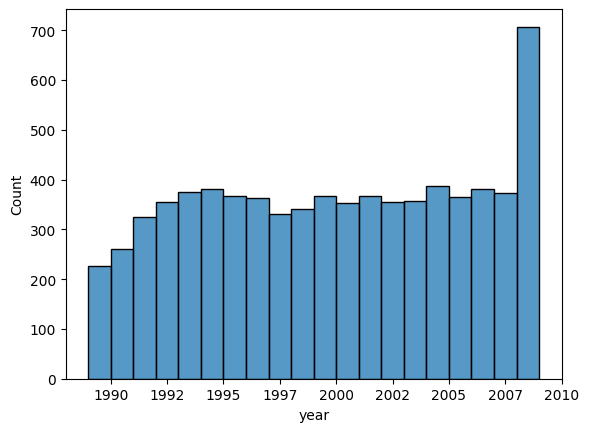

In [ ]:
sns.histplot(df['year'], bins=20)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.show()

In [ ]:
pivot_table = df.pivot_table(values='actorid', index='region', columns='year', aggfunc='count')
display(pivot_table)

year,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0
region,,,,,,,,,,,,,,,,,,,,,
Africa,57,67,86,91,90,95,91,97,110,127,...,134,139,142,133,134,123,122,117,105,90
Americas,37,39,40,40,41,43,37,33,23,20,...,18,24,32,32,41,42,42,44,37,37
Asia,90,108,112,120,125,121,119,115,117,118,...,122,136,122,132,115,122,137,136,145,140
Europe,8,12,23,43,55,58,56,54,44,42,...,48,38,38,38,38,13,12,11,12,12
Middle East,34,35,63,61,64,65,65,63,36,33,...,31,31,21,21,59,64,68,66,65,64


In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='sexual violence', hue='country/territory')
plt.title('Trend of Sexual Violence Over the Years')
plt.xlabel('Year')
plt.ylabel('Sexual Violence Cases')
plt.legend(loc='upper right')
plt.show()

ValueError: Could not interpret value `date` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

Contar o número de ocorrências por **'region'**

region
Asia           2579
Africa         2282
Middle East    1042
Americas        721
Europe          707
Name: count, dtype: int64

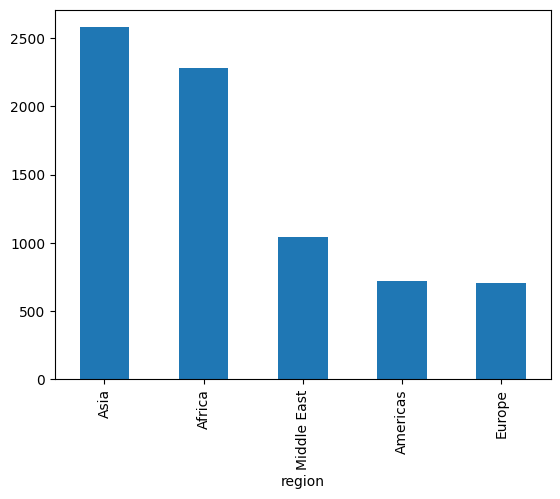

In [ ]:
display(df['region'].value_counts())

df['region'].value_counts().plot(kind='bar')
plt.show()


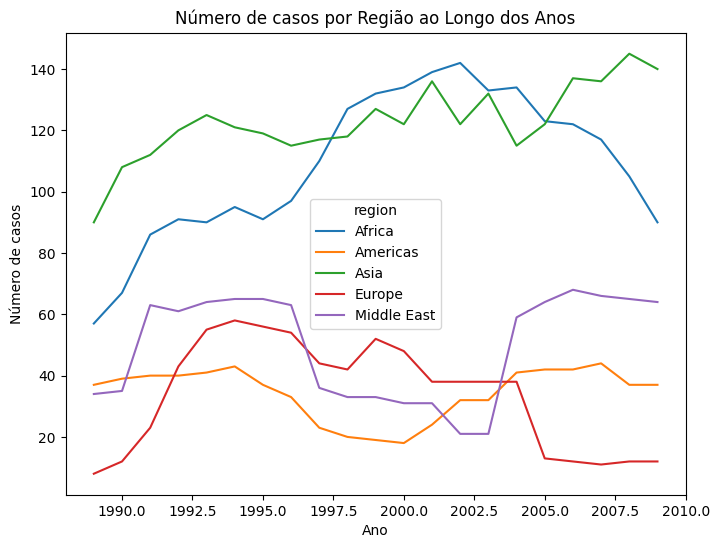

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df.groupby(['year', 'region']).size().reset_index(name='count'),
x='year', y='count', hue='region')
plt.title('Número de casos por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de casos')
plt.show()


In [ ]:
df_grouped = df.groupby('year').size().reset_index(name='count')
plt.plot(df_grouped['year'], df_grouped['count'], marker='o')
plt.title('Tendência de casos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Conflitos')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

C:\Users\muril\AppData\Local\Temp\ipykernel_10252\1616526859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abuses_most_frequent_df['year'] = abuses_most_frequent_df['year'].astype(int)


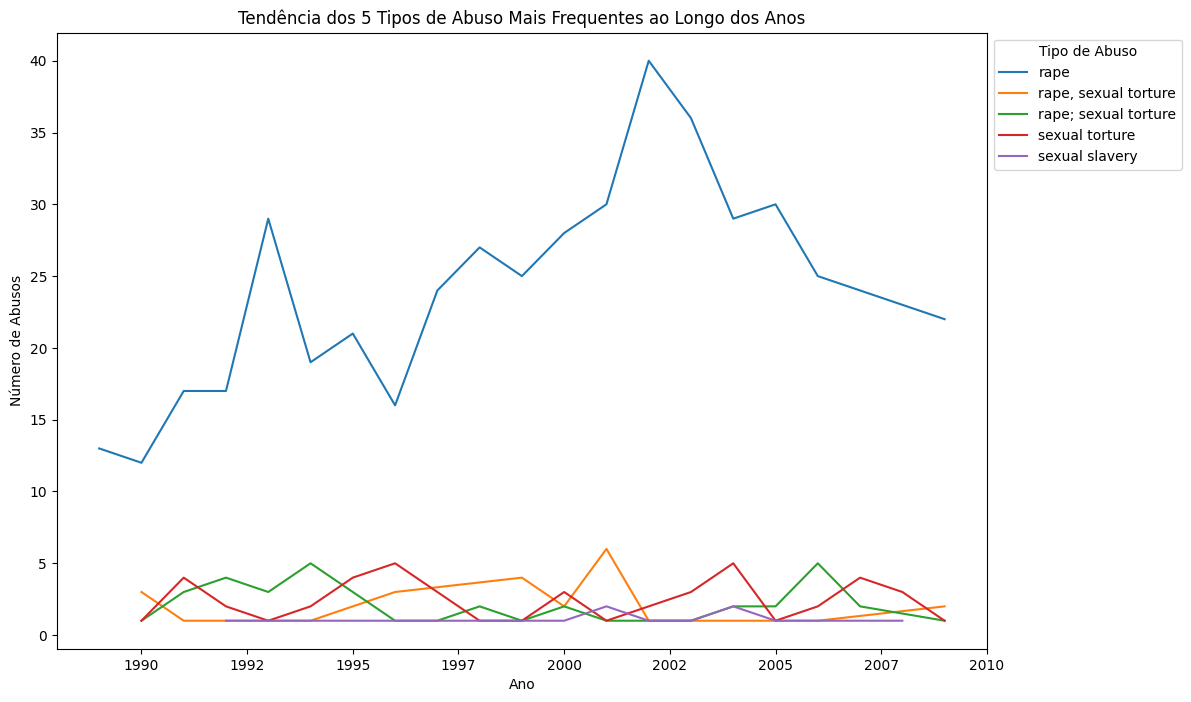

In [ ]:
abuses_most_frequent = df['form'].value_counts().nlargest(5).index
abuses_most_frequent_df = df[df['form'].isin(abuses_most_frequent)]

abuses_most_frequent_df['year'] = abuses_most_frequent_df['year'].astype(int)

data_grouped = abuses_most_frequent_df.groupby(['year', 'form']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_grouped, x='year', y='count', hue='form')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Tendência dos 5 Tipos de Abuso Mais Frequentes ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Abusos')
plt.legend(title='Tipo de Abuso', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
